In [1]:
# Required Packages
import pandas as pd

# preprocessing
from sklearn import preprocessing

# Norm
from scipy.stats import norm

# Progress Bar
import progressbar

# Others
import re

# Plots

import seaborn as sns
import matplotlib.pyplot as plt

# sns setting
sns.set_context("paper", rc={"font.size":12,"axes.titlesize":14,"axes.labelsize":12})
sns.set_style("whitegrid")

# plt setting
plt.style.use('seaborn-whitegrid')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

![title](https://upload.wikimedia.org/wikipedia/commons/5/51/IBM_logo.svg)

# IBM HR Analytics Employee Attrition & Performance

In this study, we analyze HR data available from   [kaggle.com](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) 

This data is **fictional** and it is created by IBM data scientists.

Categorical Parameters:

|                           |       1       |    2    |     3     |      4      |    5   |
|:-------------------------:|:-------------:|:-------:|:---------:|:-----------:|:------:|
|         Education         | Below College | College |  Bachelor |    Master   | Doctor |
|  Environment Satisfaction |      Low      |  Medium |    High   |  Very High  |        |
|      Job Involvement      |      Low      |  Medium |    High   |  Very High  |        |
|      Job Satisfaction     |      Low      |  Medium |    High   |  Very High  |        |
|     Performance Rating    |      Low      |   Good  | Excellent | Outstanding |        |
| Relationship Satisfaction |      Low      |  Medium |    High   |  Very High  |        |
|      WorkLife Balance     |      Bad      |   Good  |   Better  |     Best    |        |

#### Table of contents

* [Initial Analysis](#Initial-Analysis)
* [Features](#Features)
    * [Age](#Age)
    * [Attrition](#Attrition)
    * [Business Travel](#Business-Travel)
    * [Department](#Department)
    * [Distance from Home](#Distance-from-Home)
    * [Education](#Education)
    * [Education Field](#Education-Field)
    * [Environment Satisfaction](#Environment-Satisfaction)
    * [Gender](#Gender)
    * [Hourly Rate](#Hourly-Rate)
    * [Job Involvement](#Job-Involvement)
    * [Job Level](#Job-Level)
    * [Job Roles](#Job-Roles)
    * [Marital Status](#Marital-Status)
    * [Num Companies Worked](#Num-Companies-Worked)
    * [Over Time](#Over-Time)
    * [Percent Salary Hike](#Percent-Salary-Hike)
    * [Performance Rating](#Performance-Rating)
    * [Relationship Satisfaction](#Relationship-Satisfaction)
    * [Stock Option Level](#Stock-Option-Level)
    * [Total Working Years](#Total-Working-Years)
    * [Work-Life Balance Score](#Work-Life-Balance-Score)
    * [Years at the Company](#Years-at-the-Company)
    * [Years In Current Role](#Years-In-Current-Role)
    * [Years Since Last Promotion](#Years-Since-Last-Promotion)
    * [Years With Current Manager](#Years-With-Current-Manager)

### Loading the Data

In [2]:
Data = pd.read_excel('Data/WA_Fn-UseC_-HR-Employee-Attrition.xlsx')
Data.head().style.hide_index()

First off, the features (column names are):

In [3]:
print(Data.columns.tolist())

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


The type of data that we are dealing with:

In [4]:
Data.columns.to_series().groupby(Data.dtypes).groups

{dtype('int64'): Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
        'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
        'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
        'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
        'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
        'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
        'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager'],
       dtype='object'),
 dtype('O'): Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
        'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
       dtype='object')}

In [5]:
pd.DataFrame(Data.isnull().sum(),columns=['Number of NaN Values'])

Number of NaN Values
Age                                          0
Attrition                                    0
BusinessTravel                               0
DailyRate                                    0
Department                                   0
DistanceFromHome                             0
Education                                    0
EducationField                               0
EmployeeCount                                0
EmployeeNumber                               0
EnvironmentSatisfaction                      0
Gender                                       0
HourlyRate                                   0
JobInvolvement                               0
JobLevel                                     0
JobRole                                      0
JobSatisfaction                              0
MaritalStatus                                0
MonthlyIncome                                0
MonthlyRate                                  0
NumCompaniesWorked                           0
Over18                                       0
OverTime                                     0
PercentSalaryHike                            0
PerformanceRating                            0
RelationshipSatisfaction                     0
StandardHours                                0
StockOptionLevel                             0
TotalWorkingYears                            0
TrainingTimesLastYear                        0
WorkLifeBalance                              0
YearsAtCompany                               0
YearsInCurrentRole                           0
YearsSinceLastPromotion                      0
YearsWithCurrManager                         0

Moreover,

In [6]:
Data.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

Furthermore,

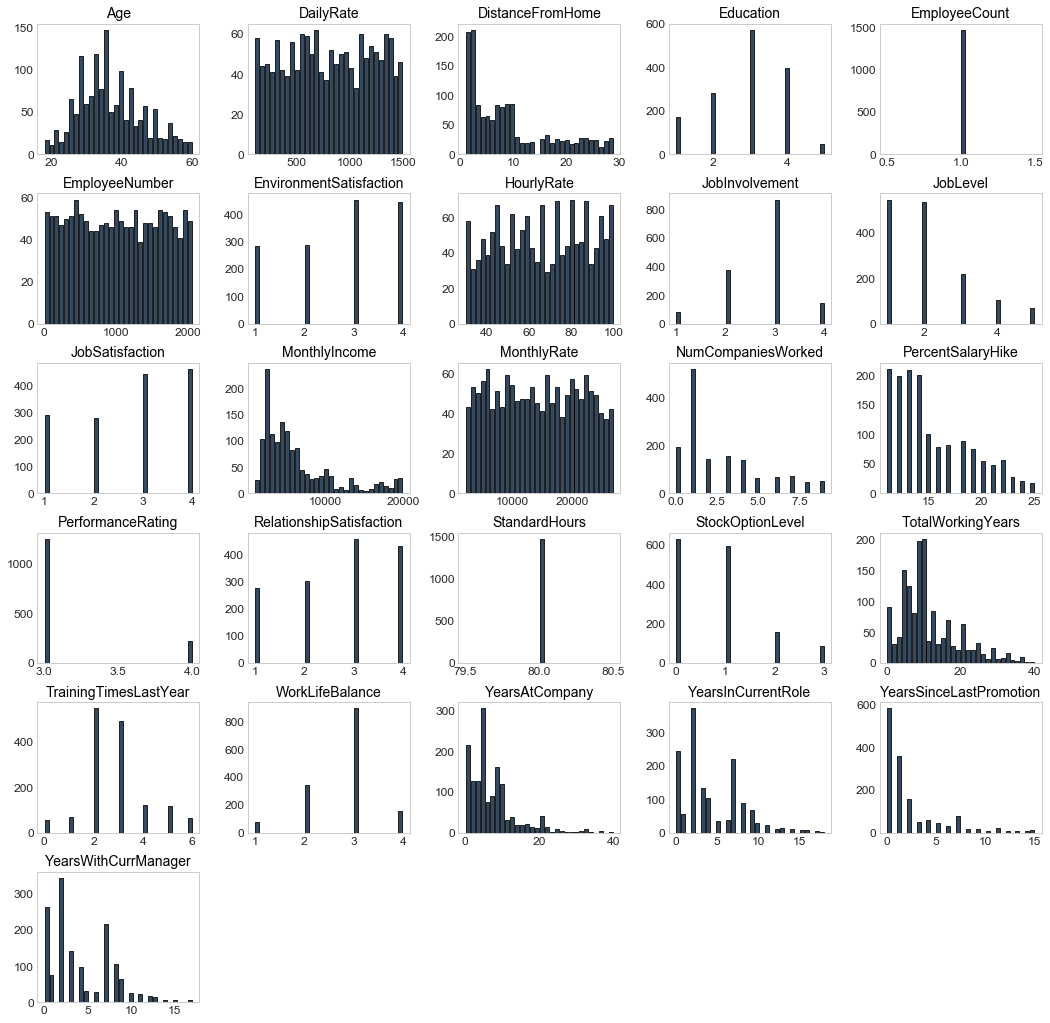

In [7]:
_ = Data.hist(bins=30, grid=False, figsize=(18,18), color='#34495e', edgecolor='k', zorder=2, rwidth=0.8)

# Features

Useful functions throughout this study

In [8]:
def Feat_Name(Inp):
    Out = re.findall('[A-Z][^A-Z]*', Inp)
    Str = ''
    for i in Out:
        Str = Str + i + ' ' 
    Out = Str[:len(Str)-1]
    return Out

In [9]:
def Range(Feat, df = Data):
    '''Displays a boxplot that includes the range of feature'''
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 0.5), sharex=False)
    Temp = np.sort(df[Feat].values)
    _ = sns.boxplot(x=Temp, ax=ax, orient='h', color='#2ecc71')
    _ = ax.set_xlabel(Feat_Name(Feat))
    _ = ax.set_xlim([Temp.min(), Temp.max()])
    _ = ax.set_xticks(Temp)

For generating Kernel Density Estimate plot using Gaussian kernels:

In [10]:
def Kernel_Density(Feat, XL = 80, df = Data):
    Temp = pd.DataFrame({'Active Employees': Data[Data['Attrition'] == 'No'][Feat],
                   'Ex-Employees': Data[Data['Attrition'] == 'Yes'][Feat]})
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 6))
    _ = Temp.plot.kde(bw_method=0.3, ax=ax, fontsize = 14)
    _ = ax.set_xlim([0, XL])
    _ = ax.set_title(Feat_Name(Feat), fontsize =14)

In [11]:
def Pie_Plot(Feat):
    Group = Data.groupby([Feat])[Feat].agg({'Count' :'count'})

    fig, ax = plt.subplots(1,1, figsize=(6,6))
    _ = Group.plot.pie(y='Count', startangle=90, legend=False,label='',ax=ax, autopct='%1.1f%%',
                       colors = sns.color_palette("muted", len(Group)), fontsize=12)
    NM = 1
    if Group.shape[0]>10:
        NM =2
    _ = ax.legend(bbox_to_anchor=(2, 1), fontsize=11, ncol=NM)
    _ = ax.set_title(Feat_Name(Feat), fontsize =14)

In [12]:
def Tables(Feat, df = Data):
    Group = df.groupby([Feat])[Feat].agg({'Count' :'count'})
    Group1 = df.groupby(['Attrition',Feat])[Feat].agg({'Count' :'count'})
    return Group, Group1

In [13]:
def Ratio_Plot(Feat, XL = 800, Hspace=0.5, df= Data):
    Group = df.groupby([Feat])[Feat].agg({'Count' :'count'})
    Group = Group.reset_index(drop = False)
    Group1 = df.groupby(['Attrition',Feat])[Feat].agg({'Count' :'count'})
    Group1 = Group1.reset_index(drop = False)

    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 2*Group.shape[0]+1))
    # Top Plot
    _ = Group.plot.barh(ax= ax[0], y='Count', x=Feat, color='#34495e', edgecolor='k',
                        fontsize = 14, rot=0, label ='All Employees')
    _ = Group1[Group1.Attrition =='No'].plot.barh(ax= ax[0], y='Count', x=Feat, color='#2ecc71', edgecolor='k',
                                                fontsize = 14, rot=0, label='Active Employees')
    _ = ax[0].set_title('Active Employees', fontsize = 14)
    _ = ax[0].set_xlabel('Count', fontsize = 14)
    _ = ax[0].set_ylabel(Feat_Name(Feat), fontsize = 14)
    _ = ax[0].set_xlim([0, XL])
    # Bottom Plot
    _ = Group.plot.barh(ax= ax[1], y='Count', x=Feat,color='#34495e', edgecolor='k',
                        fontsize = 14, rot=0, label ='All Employees')
    _ = Group1[Group1.Attrition =='Yes'].plot.barh(ax= ax[1], y='Count', x=Feat, color='#e74c3c', edgecolor='k',
                                                   fontsize = 14, rot=0, label = 'Ex-Employees')
    _ = ax[1].set_title('Ex-Employees', fontsize = 14)
    _ = ax[1].set_xlabel('Count', fontsize = 14)
    _ = ax[1].set_ylabel(Feat_Name(Feat), fontsize = 14)
    _ = ax[1].set_xlim([0, XL])
    plt.subplots_adjust(hspace=Hspace)

In [14]:
def Ratio_Plot2(Feat, XL = 800, Hspace=0.5, df= Data):
    Group = df.groupby([Feat])[Feat].agg({'Count' :'count'})
    Group = Group.reset_index(drop = False)
    Group1 = df.groupby(['Attrition',Feat])[Feat].agg({'Count' :'count'})
    Group1 = Group1.reset_index(drop = False)

    fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(18, 10))
    # Top Plot
    _ = Group.plot.bar(ax= ax[0], y='Count', x=Feat, color='#34495e', edgecolor='k',
                        fontsize = 14, rot=0, label ='All Employees')
    _ = Group1[Group1.Attrition =='No'].plot.bar(ax= ax[0], y='Count', x=Feat, color='#2ecc71', edgecolor='k',
                                                fontsize = 14, rot=0, label='Active Employees')
    _ = ax[0].set_title('Active Employees', fontsize = 14)
    _ = ax[0].set_ylabel('Count', fontsize = 14)
    _ = ax[0].set_xlabel(Feat_Name(Feat), fontsize = 14)
    _ = ax[0].set_ylim([0, XL])
    # Bottom Plot
    _ = Group.plot.bar(ax= ax[1], y='Count', x=Feat,color='#34495e', edgecolor='k',
                        fontsize = 14, rot=0, label ='All Employees')
    _ = Group1[Group1.Attrition =='Yes'].plot.bar(ax= ax[1], y='Count', x=Feat, color='#e74c3c', edgecolor='k',
                                                   fontsize = 14, rot=0, label = 'Ex-Employees')
    _ = ax[1].set_title('Ex-Employees', fontsize = 14)
    _ = ax[1].set_ylabel('Count', fontsize = 14)
    _ = ax[1].set_xlabel(Feat_Name(Feat), fontsize = 14)
    _ = ax[1].set_ylim([0, XL])
    plt.subplots_adjust(hspace=Hspace)

## Age

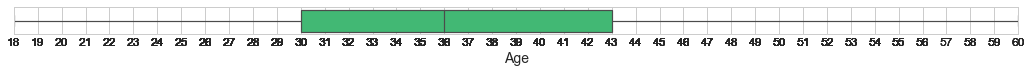

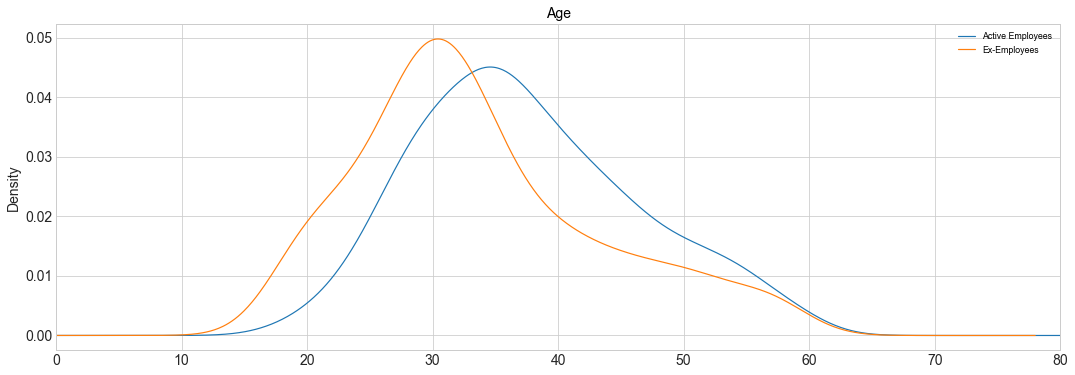

In [15]:
Feat = 'Age'
Range(Feat)
Kernel_Density(Feat)

## Attrition

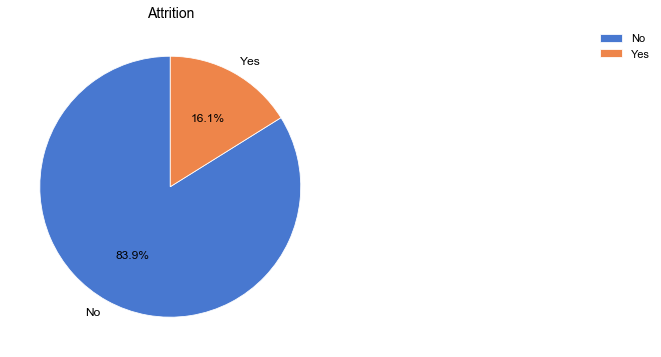

In [16]:
Feat = 'Attrition'
Pie_Plot(Feat)

## Business Travel

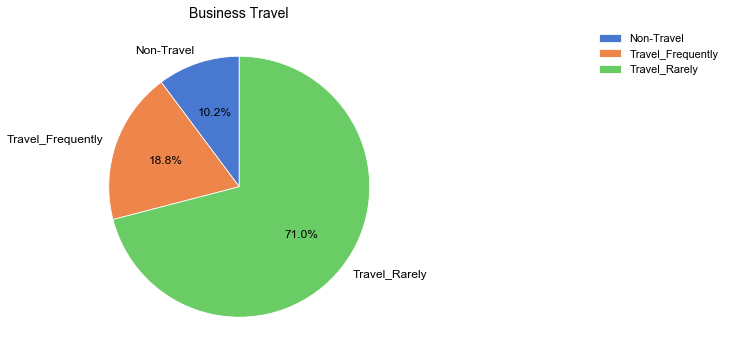

In [17]:
Feat = 'BusinessTravel'
Pie_Plot(Feat)

In [18]:
Group, Group1= Tables(Feat)
Group.T

BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely
Count                  150                277           1043

In [19]:
Group1

Count
Attrition BusinessTravel          
No        Non-Travel           138
          Travel_Frequently    208
          Travel_Rarely        887
Yes       Non-Travel            12
          Travel_Frequently     69
          Travel_Rarely        156

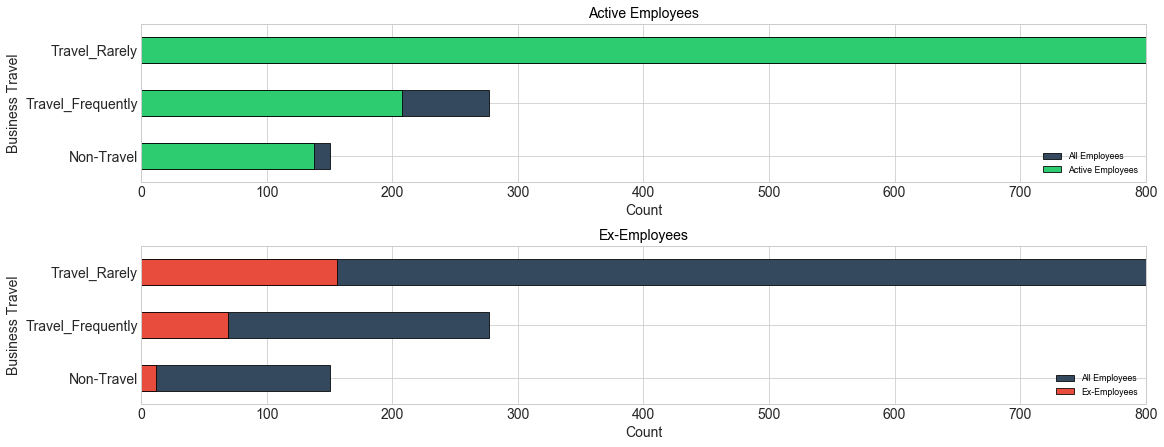

In [20]:
Ratio_Plot(Feat, Hspace=.4)

## Department

Department  Human Resources  Research & Development  Sales
Count                    63                     961    446

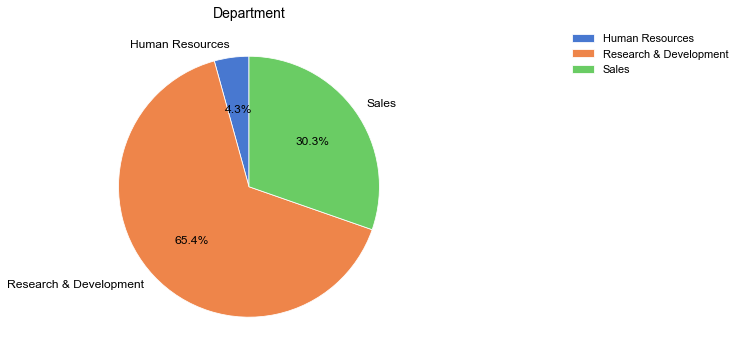

In [21]:
Feat = 'Department'
Pie_Plot(Feat)
Group, Group1= Tables(Feat)
Group.T

In [22]:
Group1

Count
Attrition Department                   
No        Human Resources            51
          Research & Development    828
          Sales                     354
Yes       Human Resources            12
          Research & Development    133
          Sales                      92

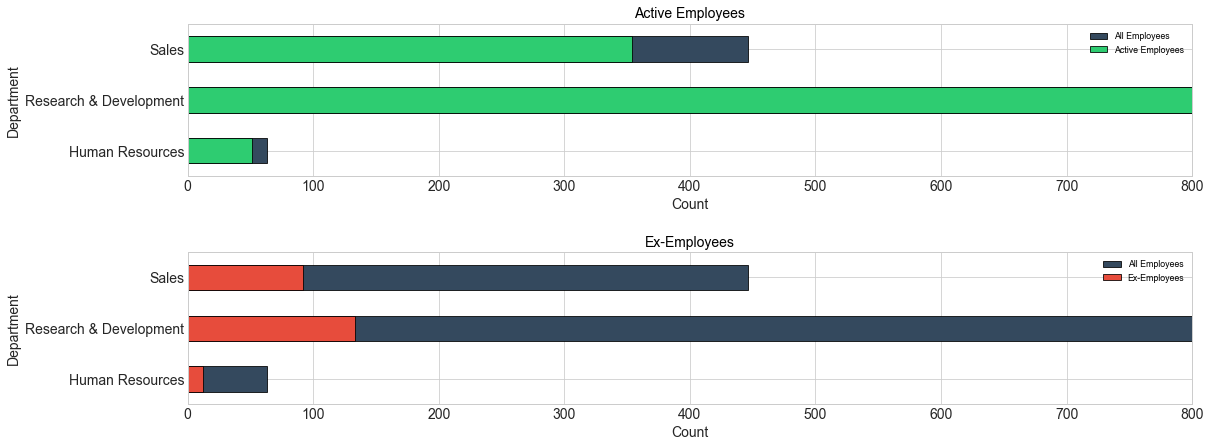

In [23]:
Ratio_Plot(Feat)

## Distance from Home

In [24]:
Feat = 'DistanceFromHome'
Range(Feat)

Error in callback <function flush_figures at 0x000002197FC20EE8> (for post_execute):


KeyboardInterrupt: 

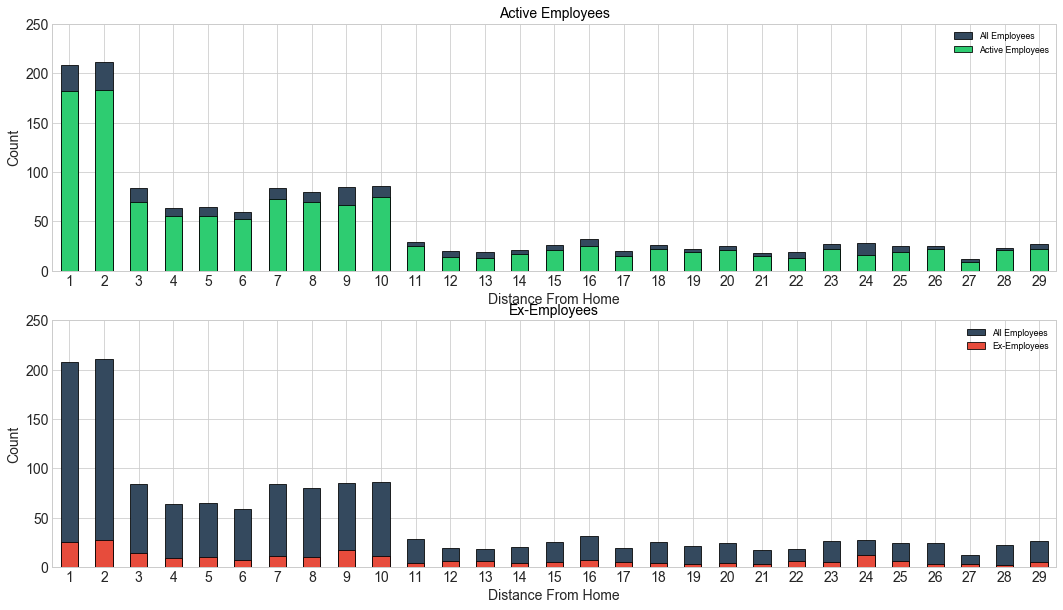

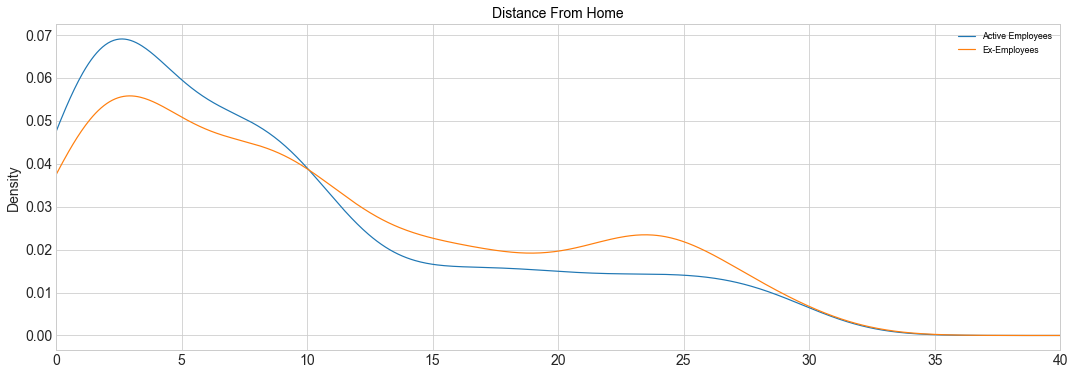

In [25]:
Ratio_Plot2(Feat, XL = 250, Hspace=0.2)
Kernel_Density(Feat,40)

## Education

Count
Education       
1            170
2            282
3            572
4            398
5             48

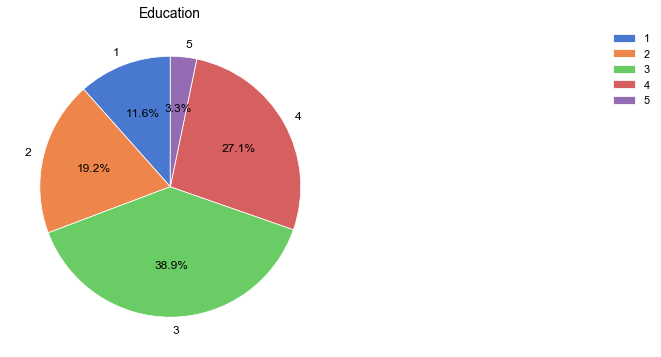

In [26]:
Feat = 'Education'
Pie_Plot(Feat)
Group, Group1= Tables(Feat)
Group

In [27]:
Group1

Count
Attrition Education       
No        1            139
          2            238
          3            473
          4            340
          5             43
Yes       1             31
          2             44
          3             99
          4             58
          5              5

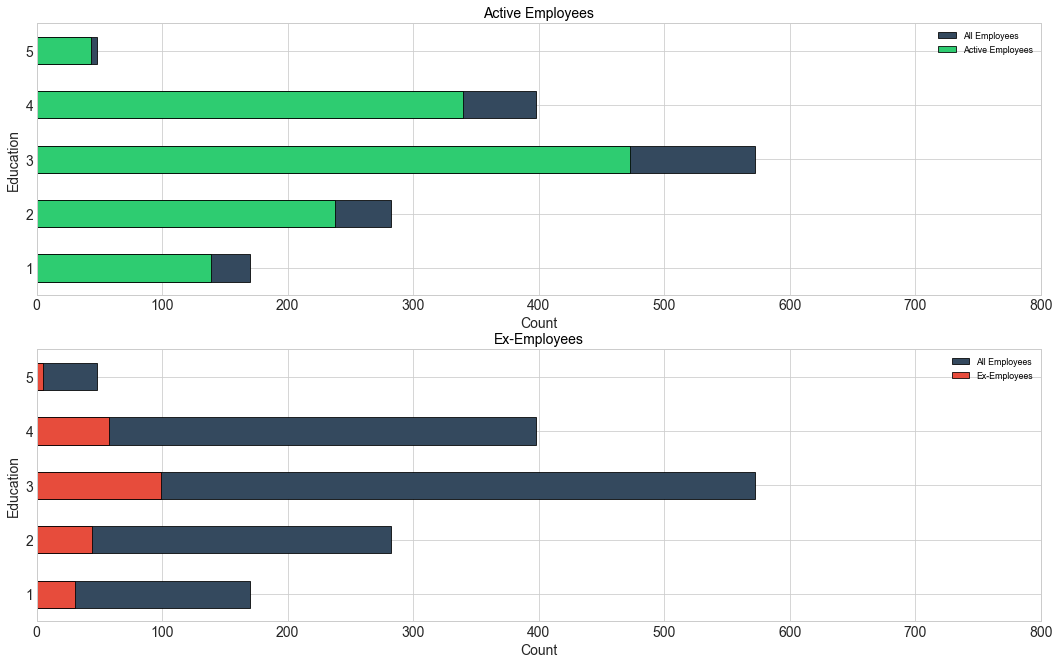

In [28]:
Ratio_Plot(Feat, Hspace =.2)

## Education Field

Count
EducationField         
Human Resources      27
Life Sciences       606
Marketing           159
Medical             464
Other                82
Technical Degree    132

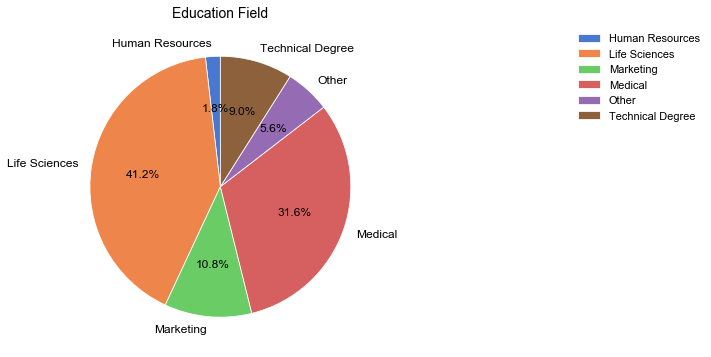

In [29]:
Feat = 'EducationField'
Pie_Plot(Feat)
Group, Group1= Tables(Feat)
Group

In [30]:
Group1

Count
Attrition EducationField         
No        Human Resources      20
          Life Sciences       517
          Marketing           124
          Medical             401
          Other                71
          Technical Degree    100
Yes       Human Resources       7
          Life Sciences        89
          Marketing            35
          Medical              63
          Other                11
          Technical Degree     32

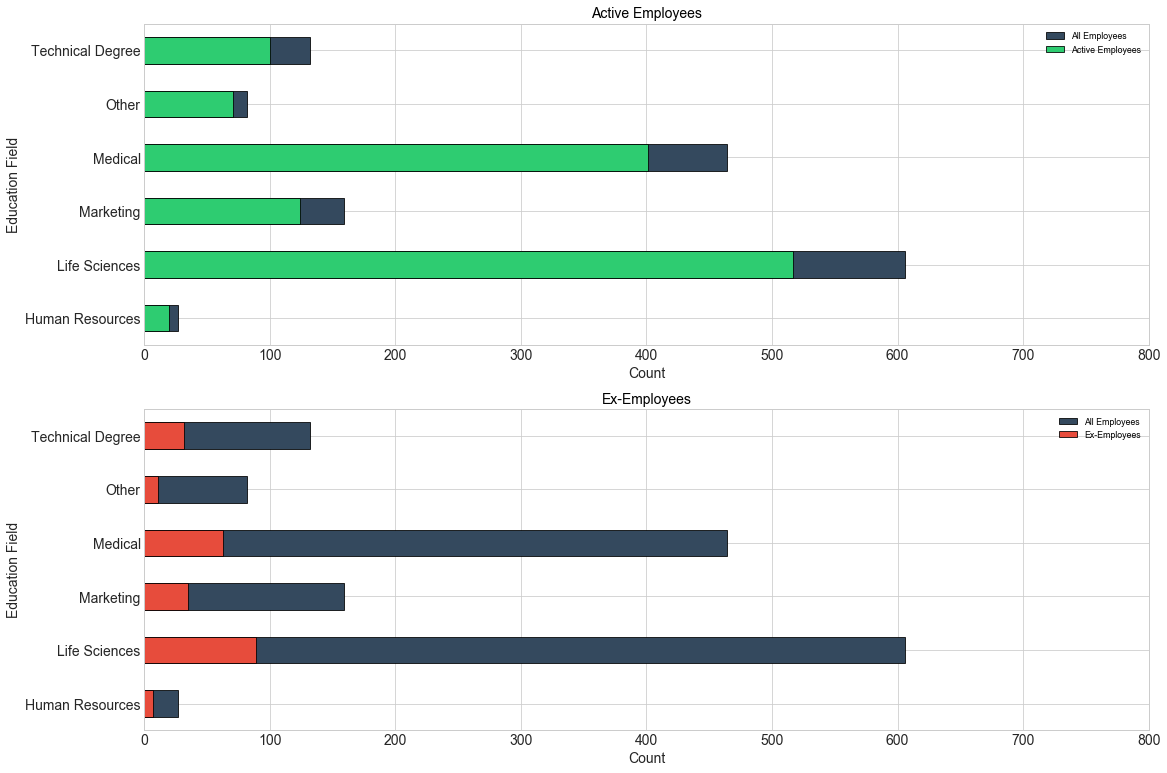

In [31]:
Ratio_Plot(Feat, Hspace =.2)

## Environment Satisfaction

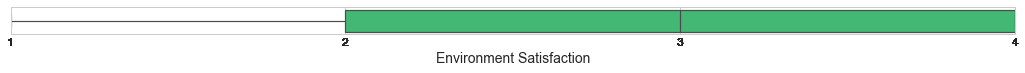

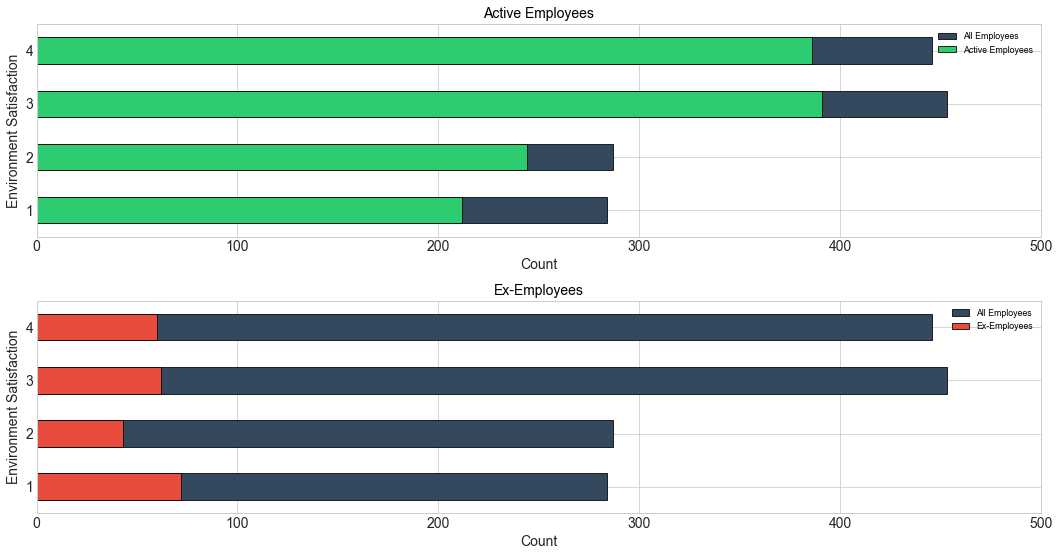

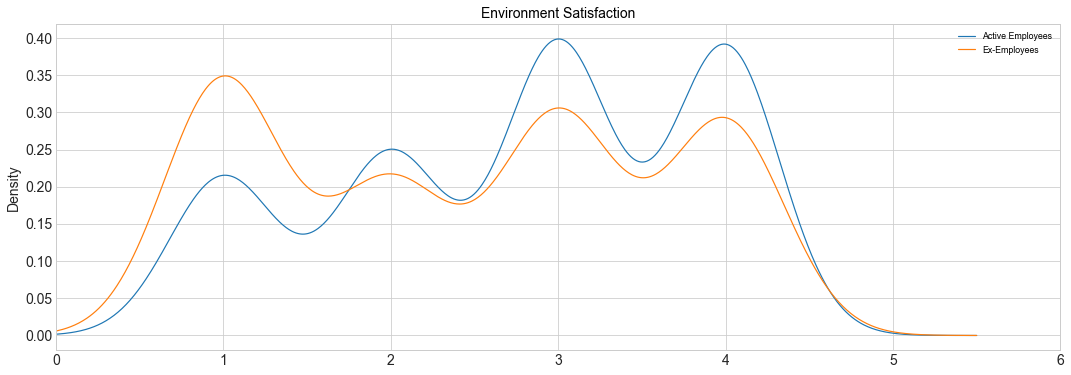

In [32]:
Feat = 'EnvironmentSatisfaction'
Range(Feat)
Ratio_Plot(Feat, XL = 5e2, Hspace=0.3)
Kernel_Density(Feat,6)

## Gender

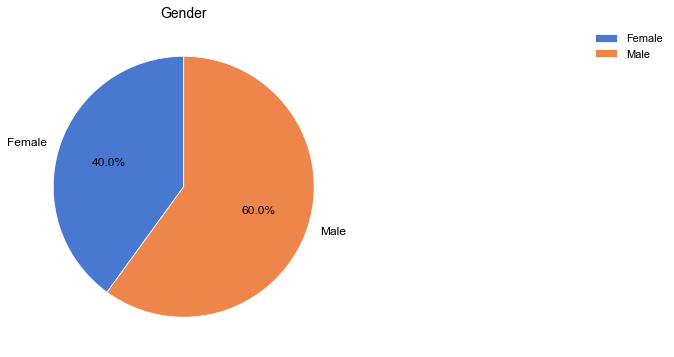

In [33]:
Feat = 'Gender'
Pie_Plot(Feat)

In [34]:
Group, Group1= Tables(Feat)
Group.T

Gender  Female  Male
Count      588   882

In [35]:
Group1

Count
Attrition Gender       
No        Female    501
          Male      732
Yes       Female     87
          Male      150

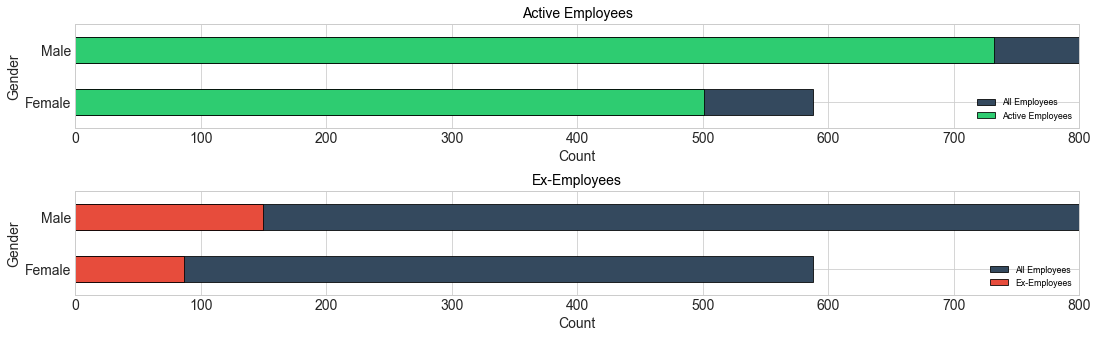

In [36]:
Ratio_Plot(Feat, Hspace=.6)

## Hourly Rate

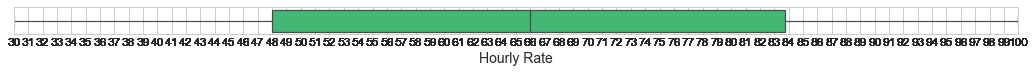

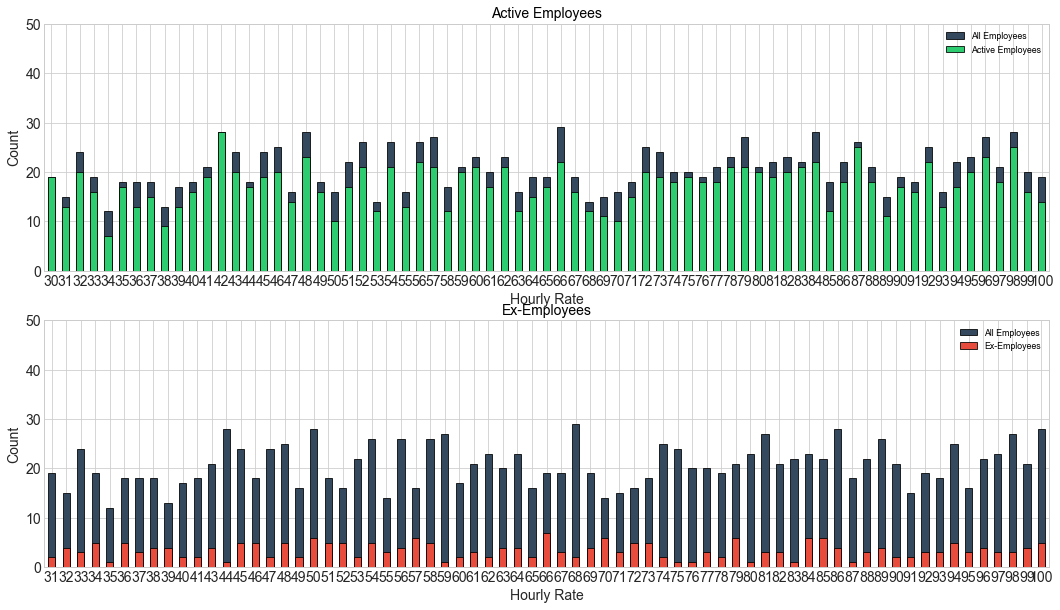

In [37]:
Feat = 'HourlyRate'
Range(Feat)
Ratio_Plot2(Feat, XL = 50, Hspace=0.2)

## Job Involvement

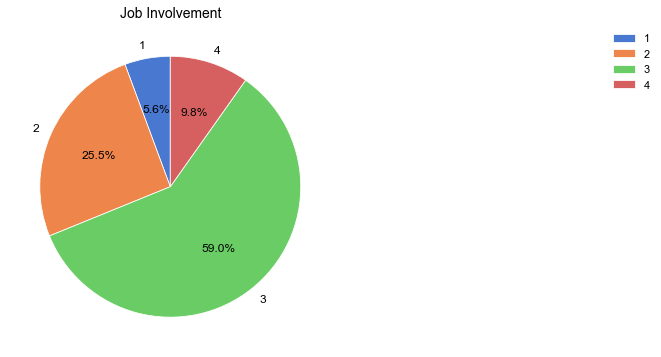

In [38]:
Feat = 'JobInvolvement'
Pie_Plot(Feat)

In [39]:
Group, Group1= Tables(Feat)
Group.T

JobInvolvement   1    2    3    4
Count           83  375  868  144

In [40]:
Group1

Count
Attrition JobInvolvement       
No        1                  55
          2                 304
          3                 743
          4                 131
Yes       1                  28
          2                  71
          3                 125
          4                  13

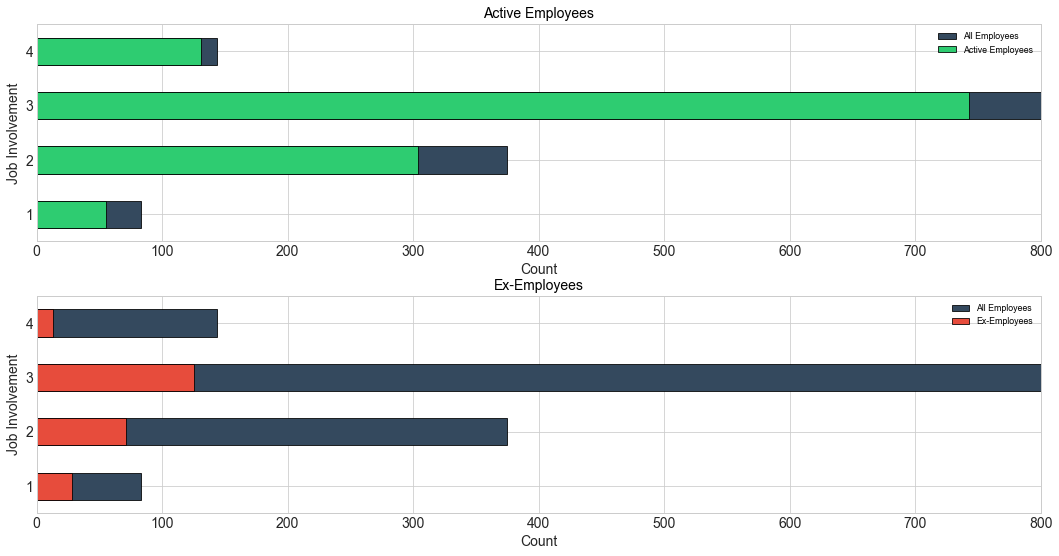

In [41]:
Ratio_Plot(Feat, Hspace=.25)

## Job Level

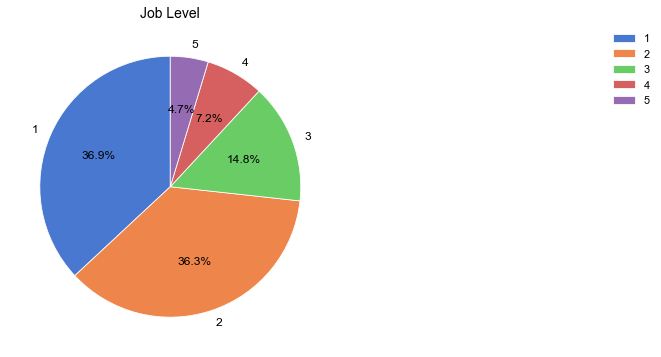

In [42]:
Feat = 'JobLevel'
Pie_Plot(Feat)

In [43]:
Group, Group1= Tables(Feat)
Group.T

JobLevel    1    2    3    4   5
Count     543  534  218  106  69

In [44]:
Group1

Count
Attrition JobLevel       
No        1           400
          2           482
          3           186
          4           101
          5            64
Yes       1           143
          2            52
          3            32
          4             5
          5             5

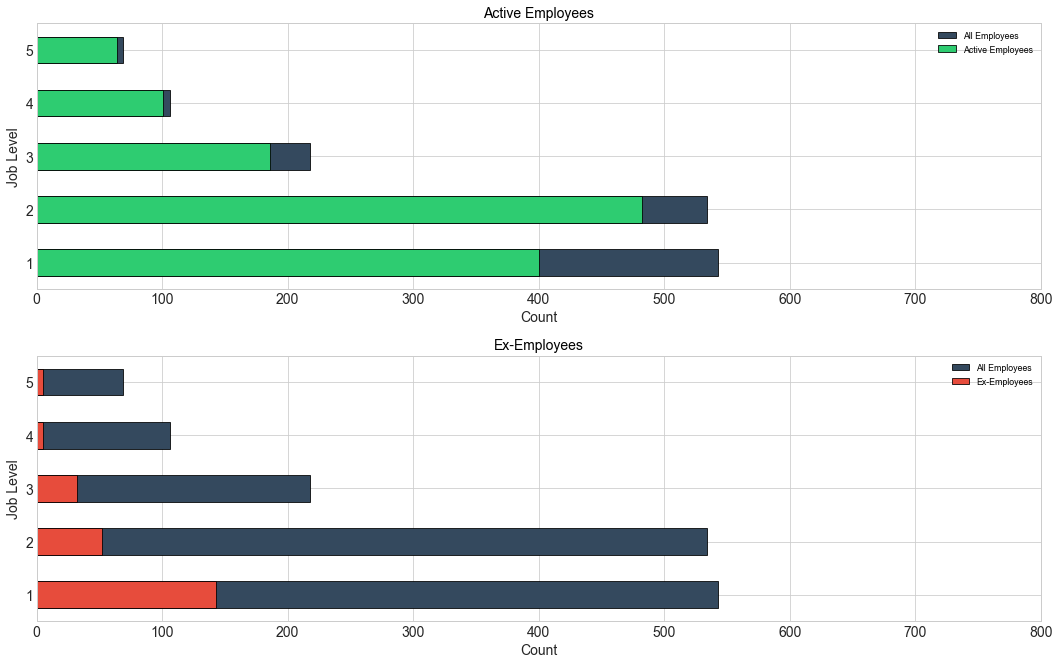

In [45]:
Ratio_Plot(Feat, Hspace=.25)

## Job Roles

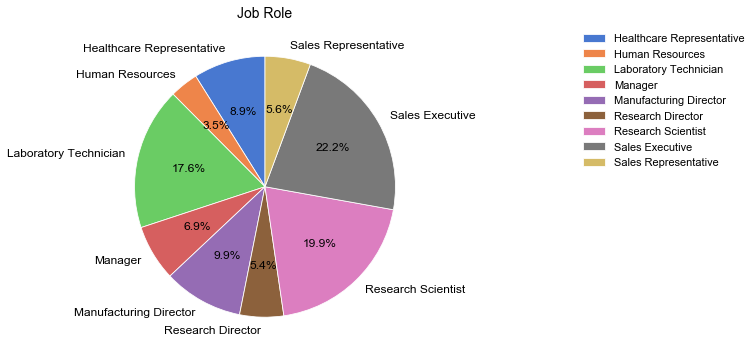

In [46]:
Feat = 'JobRole'
Pie_Plot(Feat)

In [47]:
Group, Group1= Tables(Feat)
Group

Count
JobRole                         
Healthcare Representative    131
Human Resources               52
Laboratory Technician        259
Manager                      102
Manufacturing Director       145
Research Director             80
Research Scientist           292
Sales Executive              326
Sales Representative          83

In [48]:
Group1

Count
Attrition JobRole                         
No        Healthcare Representative    122
          Human Resources               40
          Laboratory Technician        197
          Manager                       97
          Manufacturing Director       135
          Research Director             78
          Research Scientist           245
          Sales Executive              269
          Sales Representative          50
Yes       Healthcare Representative      9
          Human Resources               12
          Laboratory Technician         62
          Manager                        5
          Manufacturing Director        10
          Research Director              2
          Research Scientist            47
          Sales Executive               57
          Sales Representative          33

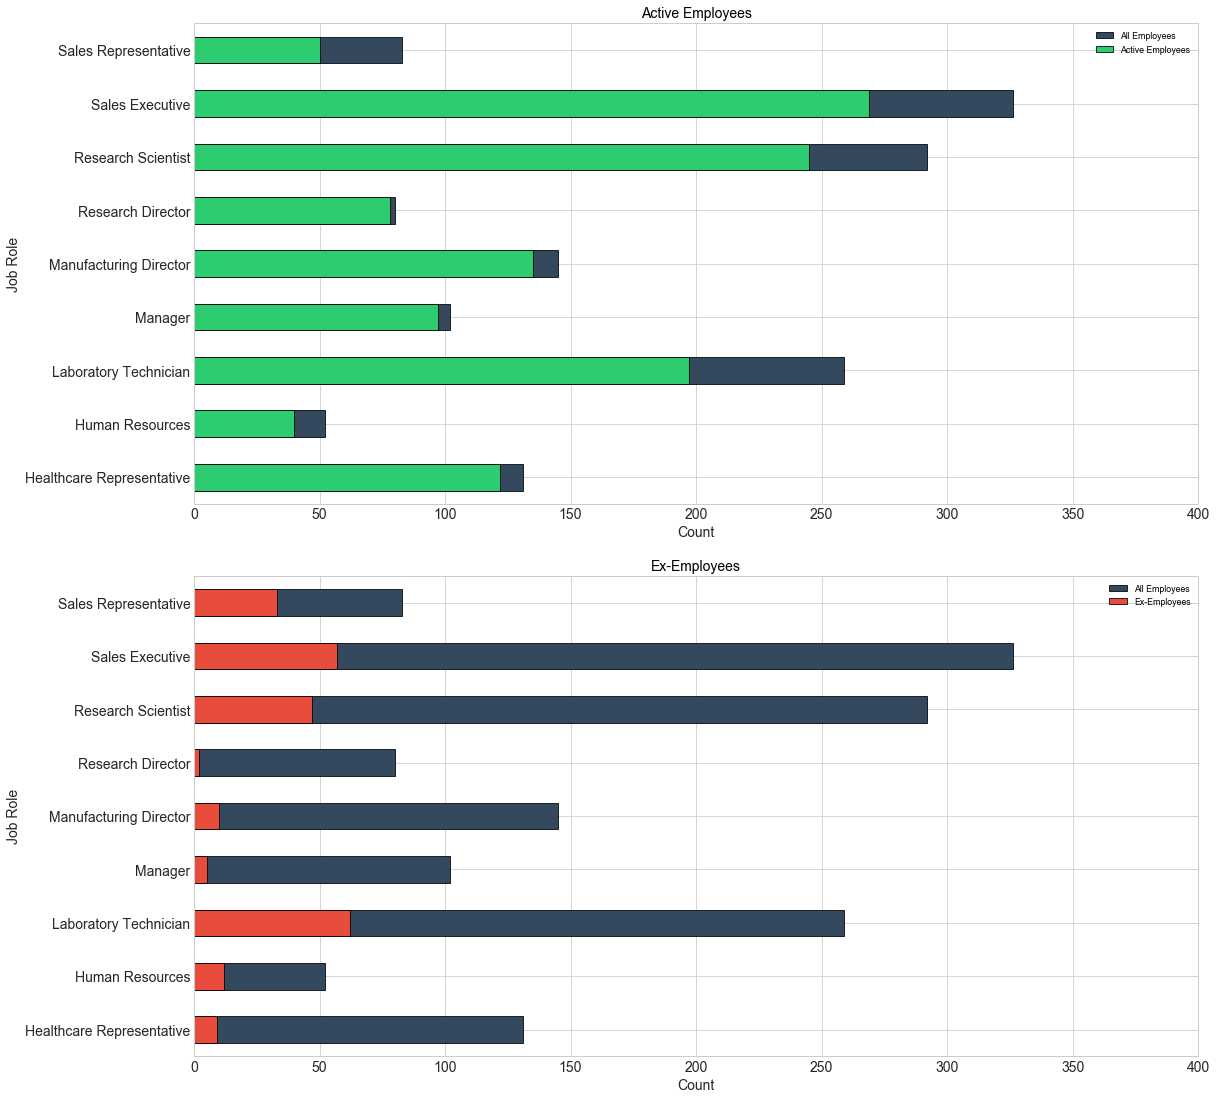

In [49]:
Ratio_Plot(Feat, XL=400, Hspace=.15)

## Job Satisfaction

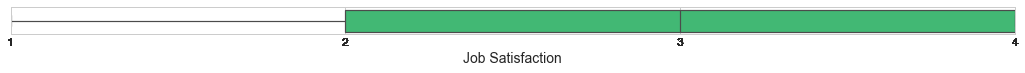

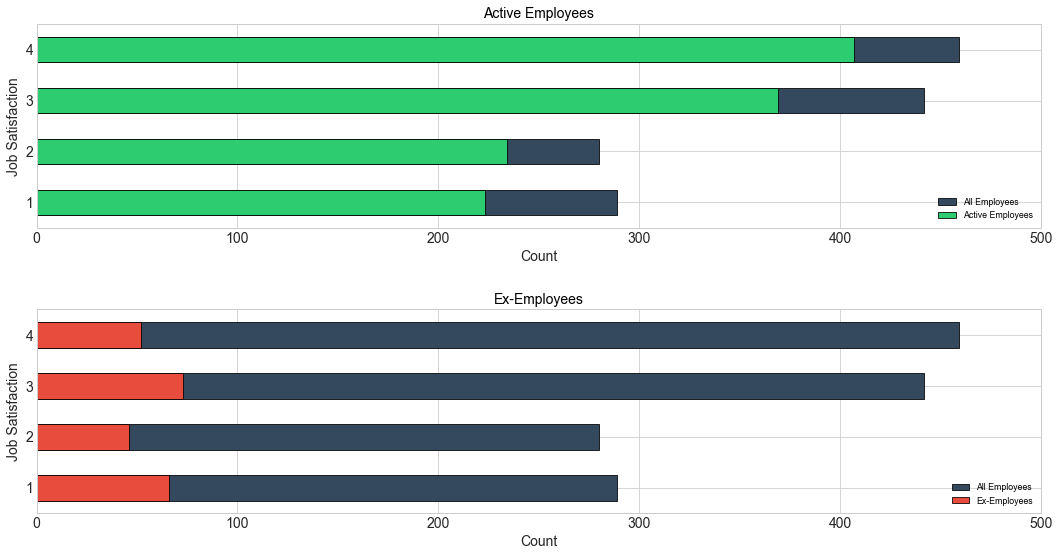

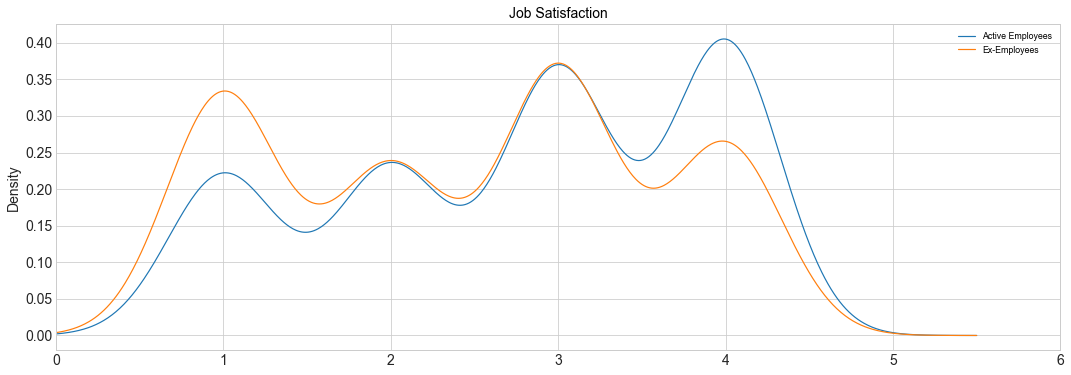

In [50]:
Feat = 'JobSatisfaction'
Range(Feat)
Ratio_Plot(Feat, XL = 5e2, Hspace=0.4)
Kernel_Density(Feat,6)

## Marital Status

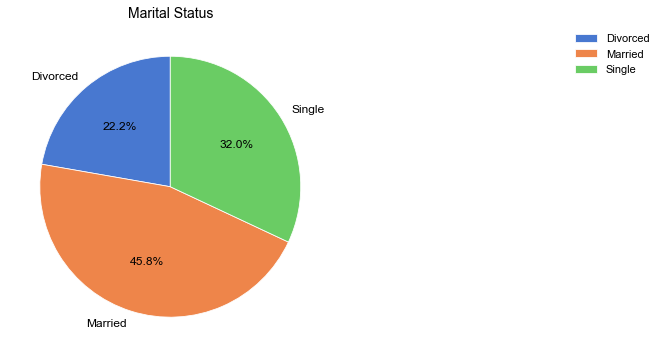

In [51]:
Feat = 'MaritalStatus'
Pie_Plot(Feat)

In [52]:
Group, Group1= Tables(Feat)
Group.T

MaritalStatus  Divorced  Married  Single
Count               327      673     470

In [53]:
Group1

Count
Attrition MaritalStatus       
No        Divorced         294
          Married          589
          Single           350
Yes       Divorced          33
          Married           84
          Single           120

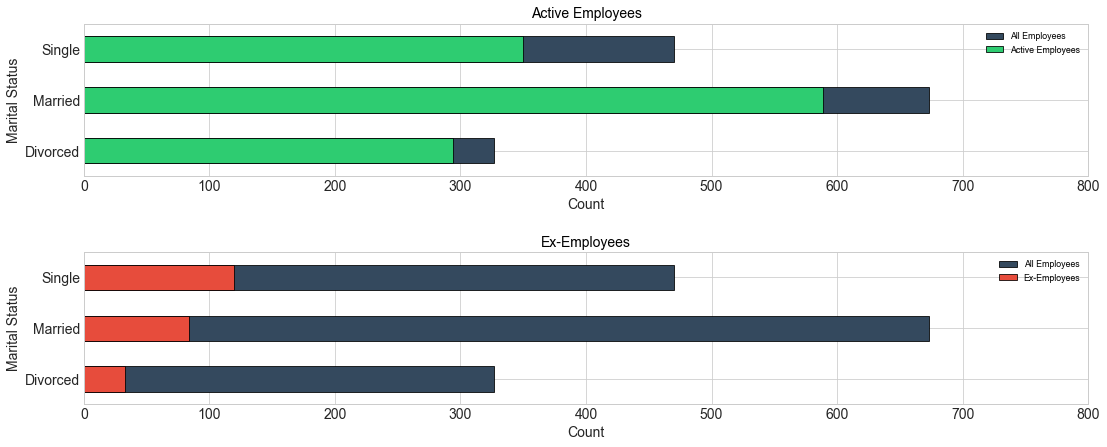

In [54]:
Ratio_Plot(Feat)

## Num Companies Worked

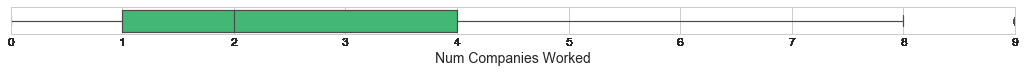

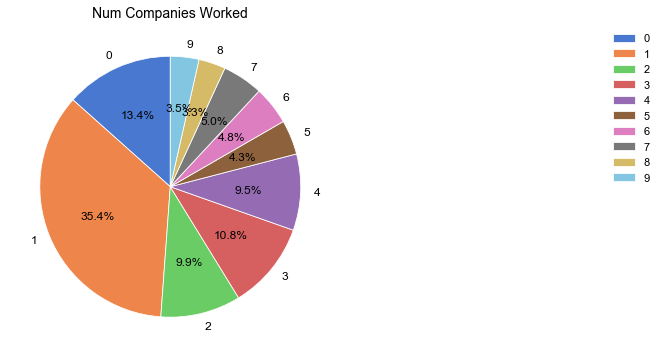

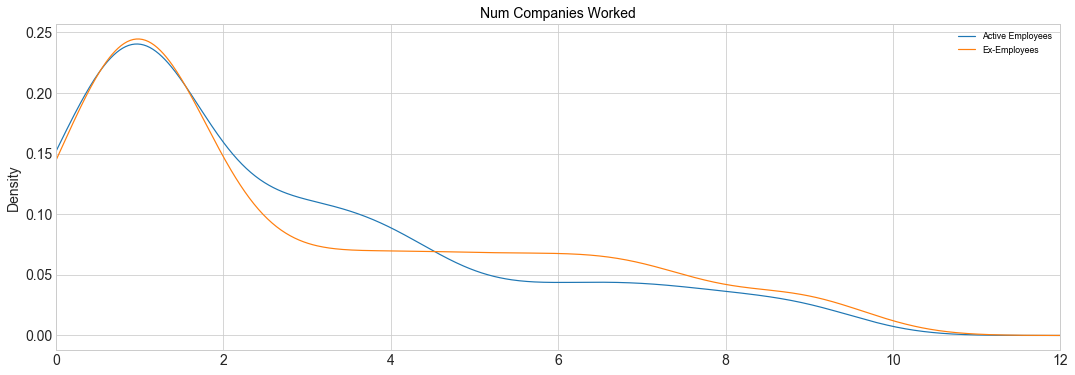

In [55]:
Feat = 'NumCompaniesWorked'
Range(Feat)
Pie_Plot(Feat)
Kernel_Density(Feat,12)

## Over Time

In [56]:
Feat = 'OverTime'
Group, Group1 = Tables(Feat)
Group.T

OverTime    No  Yes
Count     1054  416

In [57]:
Group1

Count
Attrition OverTime       
No        No          944
          Yes         289
Yes       No          110
          Yes         127

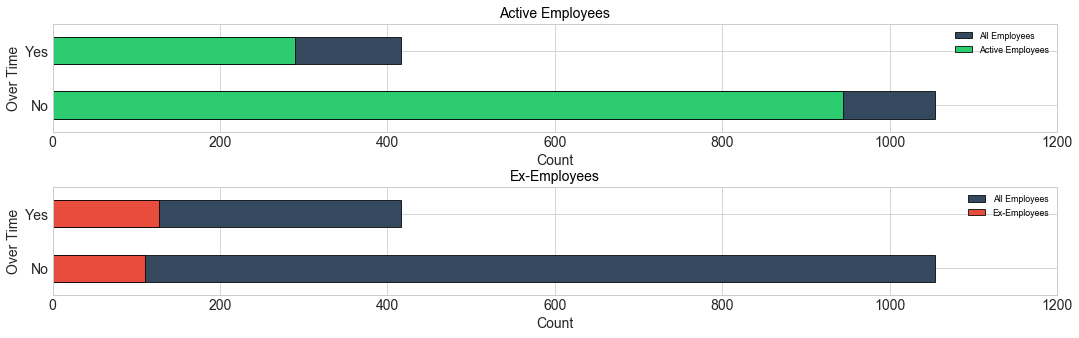

In [58]:
Ratio_Plot(Feat, Hspace=.5, XL= 1.2e3)

## Percent Salary Hike

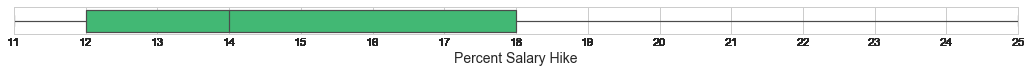

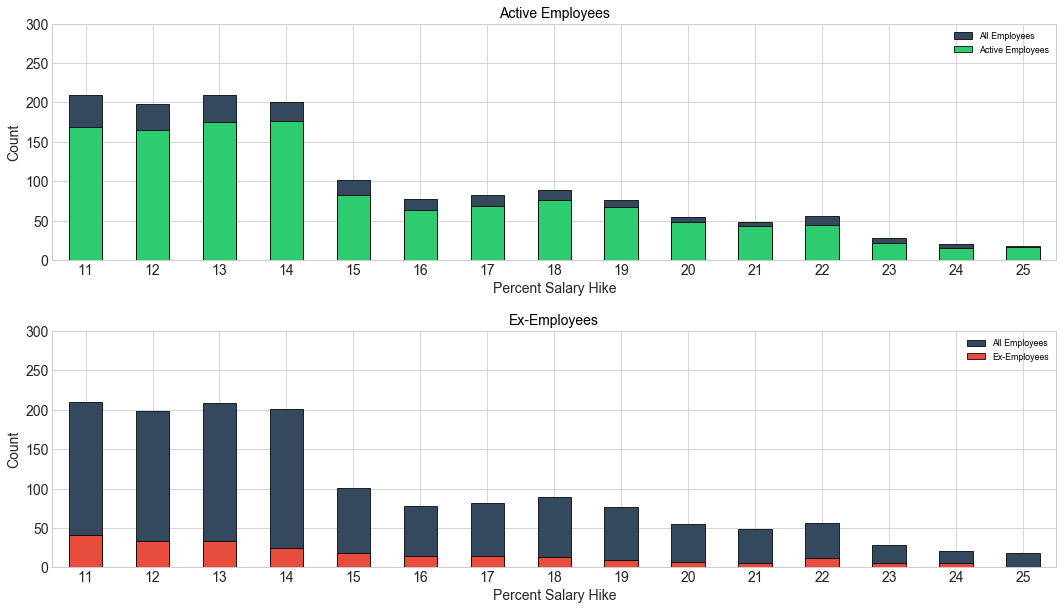

In [59]:
Feat = 'PercentSalaryHike'
Range(Feat)
Ratio_Plot2(Feat, XL = 3e2, Hspace=0.3)

## Performance Rating

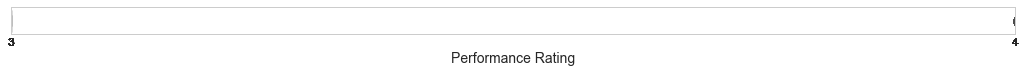

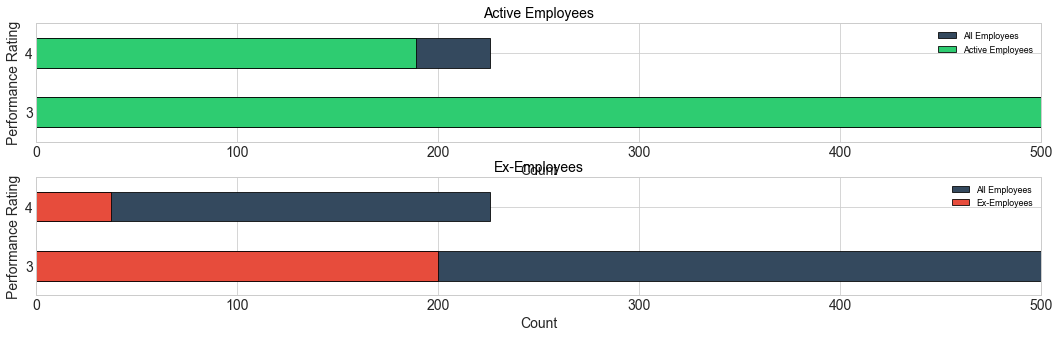

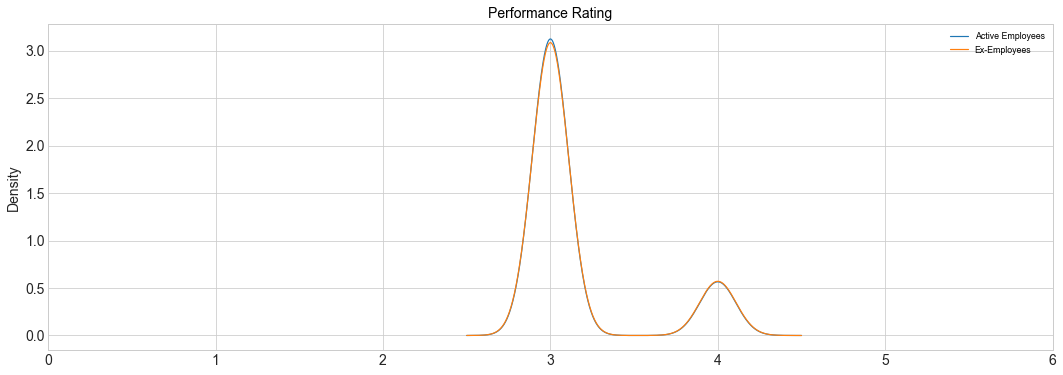

In [60]:
Feat = 'PerformanceRating'
Range(Feat)
Ratio_Plot(Feat, XL = 5e2, Hspace=0.3)
Kernel_Density(Feat,6)

## Relationship Satisfaction

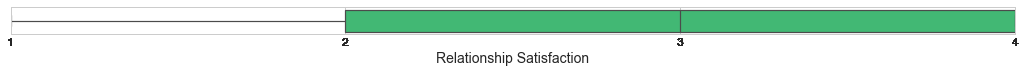

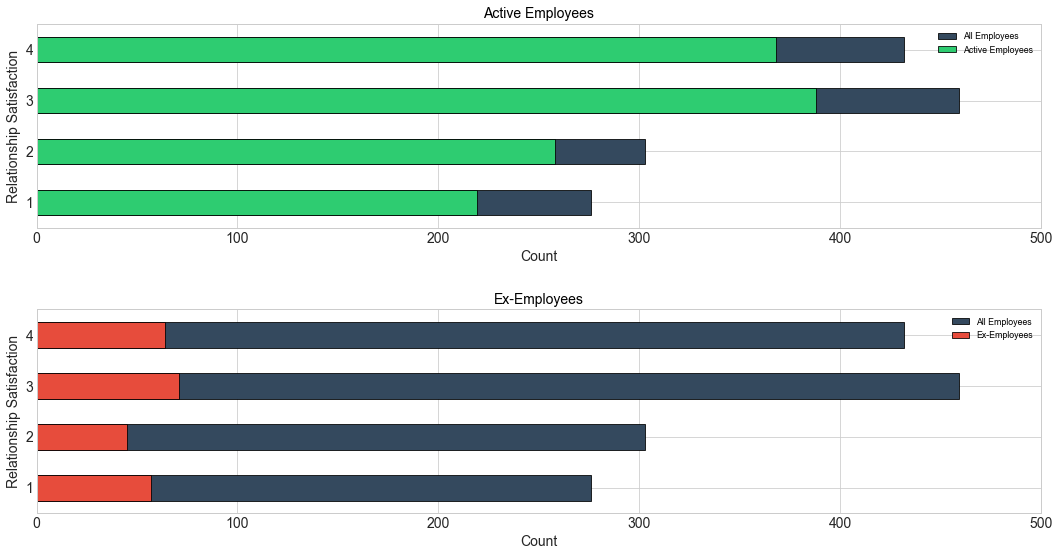

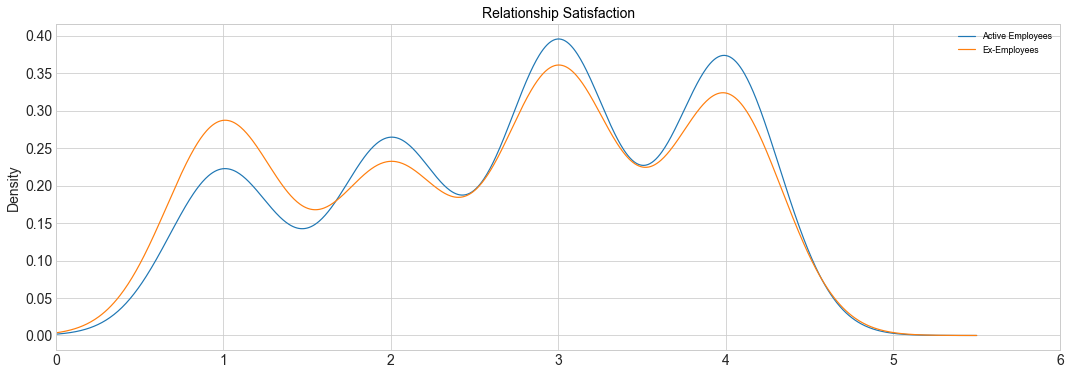

In [61]:
Feat = 'RelationshipSatisfaction'
Range(Feat)
Ratio_Plot(Feat, XL = 5e2, Hspace=0.4)
Kernel_Density(Feat,6)

## Stock Option Level

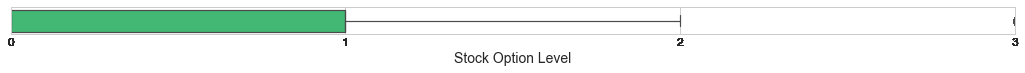

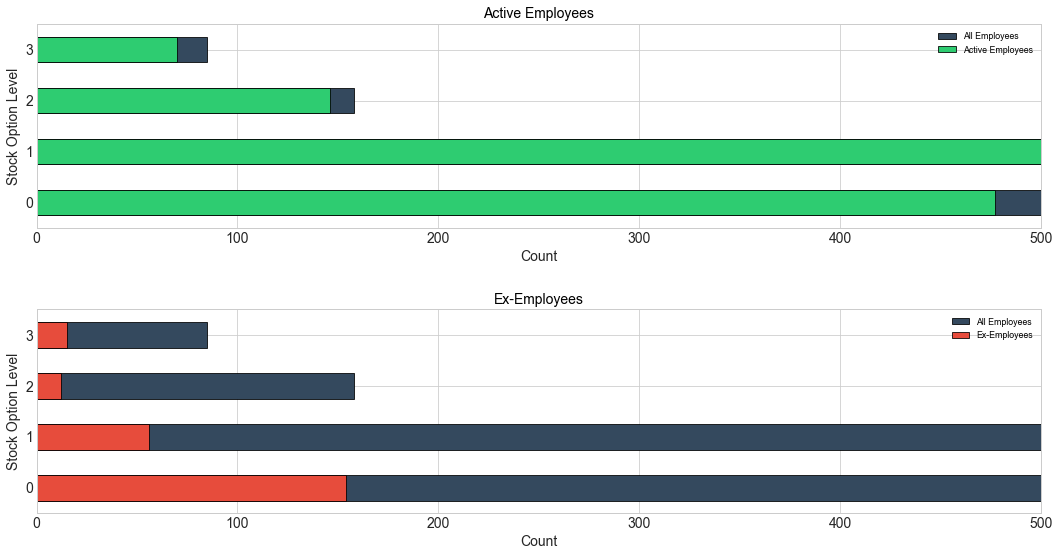

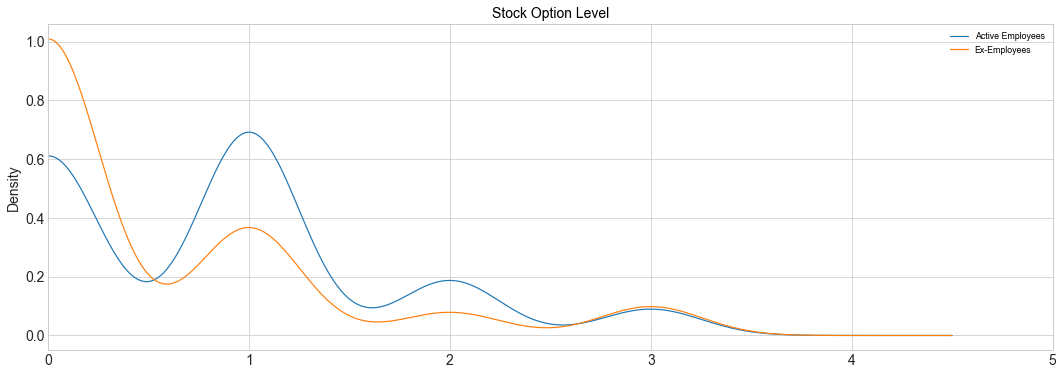

In [62]:
Feat = 'StockOptionLevel'
Range(Feat)
Ratio_Plot(Feat, XL = 5e2, Hspace=0.4)
Kernel_Density(Feat,5)

## Total Working Years

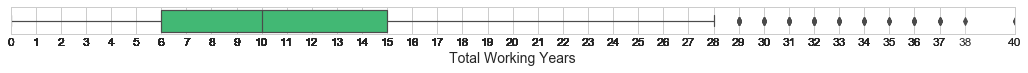

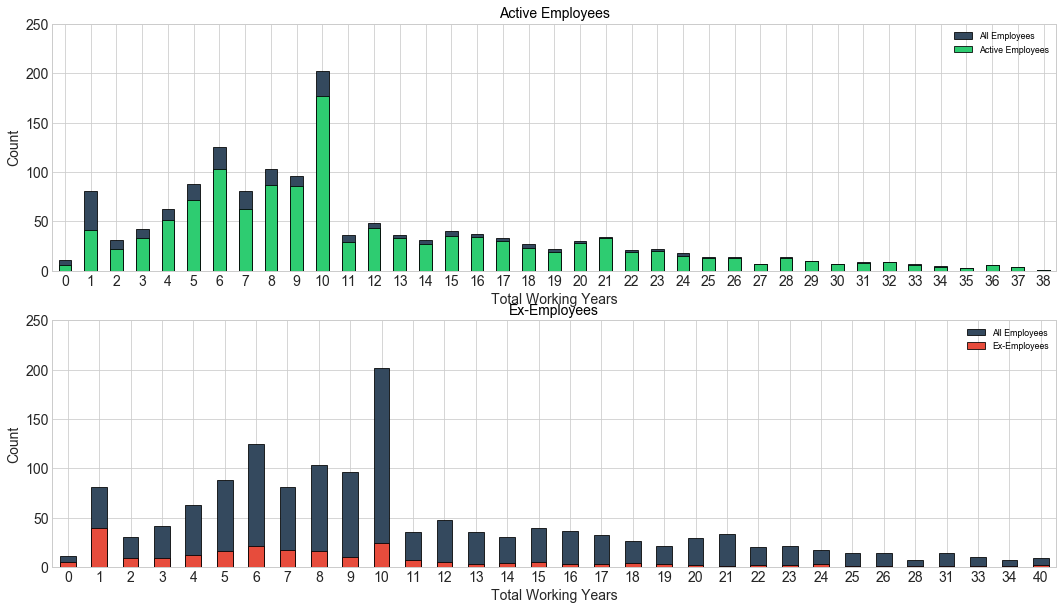

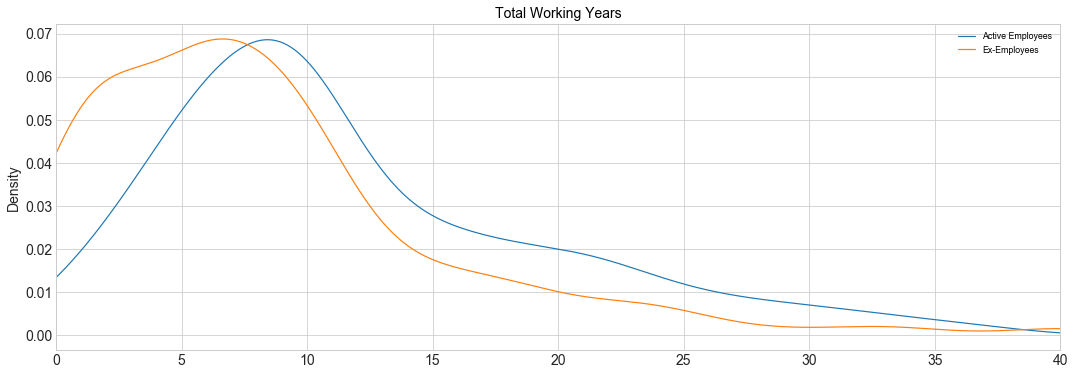

In [63]:
Feat = 'TotalWorkingYears'
Range(Feat)
Ratio_Plot2(Feat, XL = 250, Hspace=0.2)
Kernel_Density(Feat,40)

## Training Times Last Year

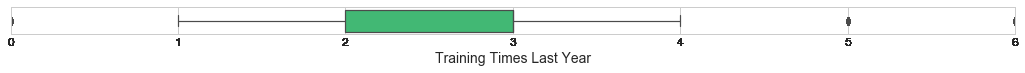

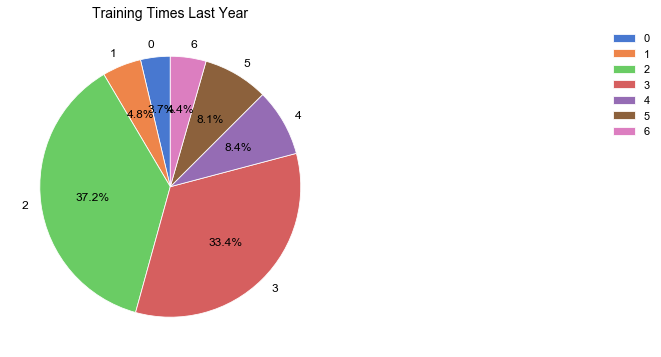

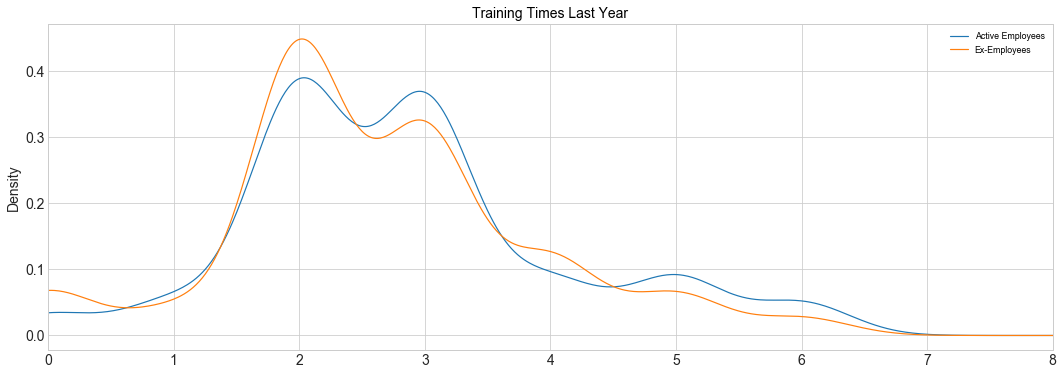

In [64]:
Feat = 'TrainingTimesLastYear'
Range(Feat)
Pie_Plot(Feat)
Kernel_Density(Feat,8)

In [65]:
Group = Data.groupby(['NumCompaniesWorked'])['NumCompaniesWorked'].agg({'Count' :'count'})
Temp = Data[Data['Attrition']=='Yes'].groupby(['NumCompaniesWorked'])['NumCompaniesWorked'].agg({'Count' :'count'})
Group['Percentage of Leavers']=100*Temp.values/Group.values
del Temp
Group = Group.drop(columns=['Count'])
Group

Percentage of Leavers
NumCompaniesWorked                       
0                               11.675127
1                               18.809981
2                               10.958904
3                               10.062893
4                               12.230216
5                               25.396825
6                               22.857143
7                               22.972973
8                               12.244898
9                               23.076923

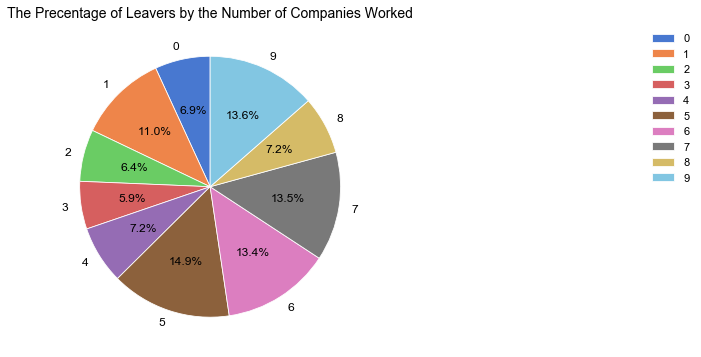

In [66]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
_ = Group.plot.pie(y='Percentage of Leavers', startangle=90, legend=False,label='',ax=ax, autopct='%1.1f%%',
                   colors = sns.color_palette("muted", len(Group)), fontsize=12)
_ = ax.legend(bbox_to_anchor=(2, 1), fontsize=11, ncol=1)
_ = ax.set_title('The Precentage of Leavers by the Number of Companies Worked', fontsize =14)

## Work-Life Balance Score

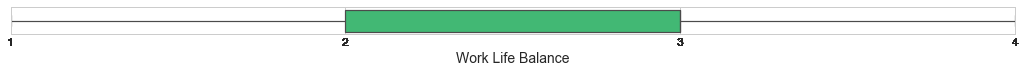

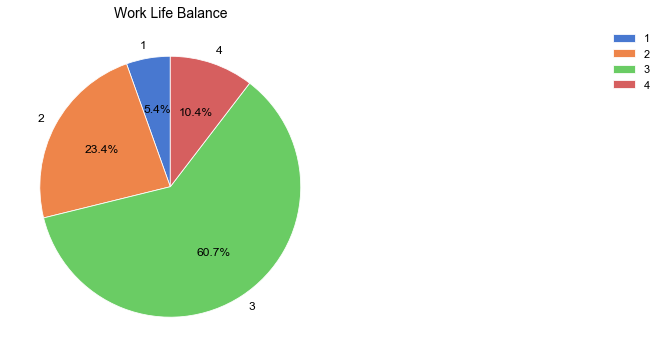

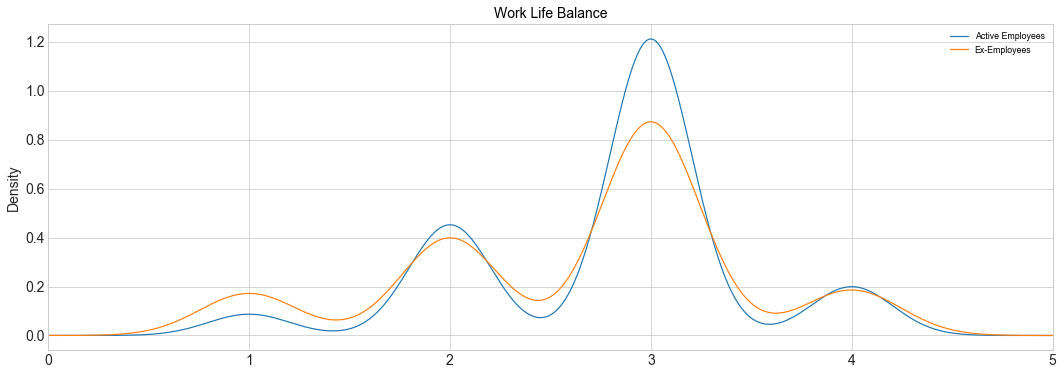

In [67]:
Feat = 'WorkLifeBalance'
Range(Feat)
Pie_Plot(Feat)
Kernel_Density(Feat,5)

## Years at the Company

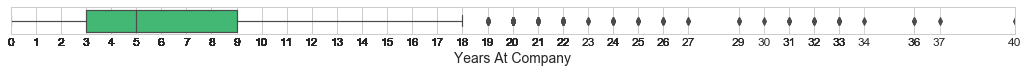

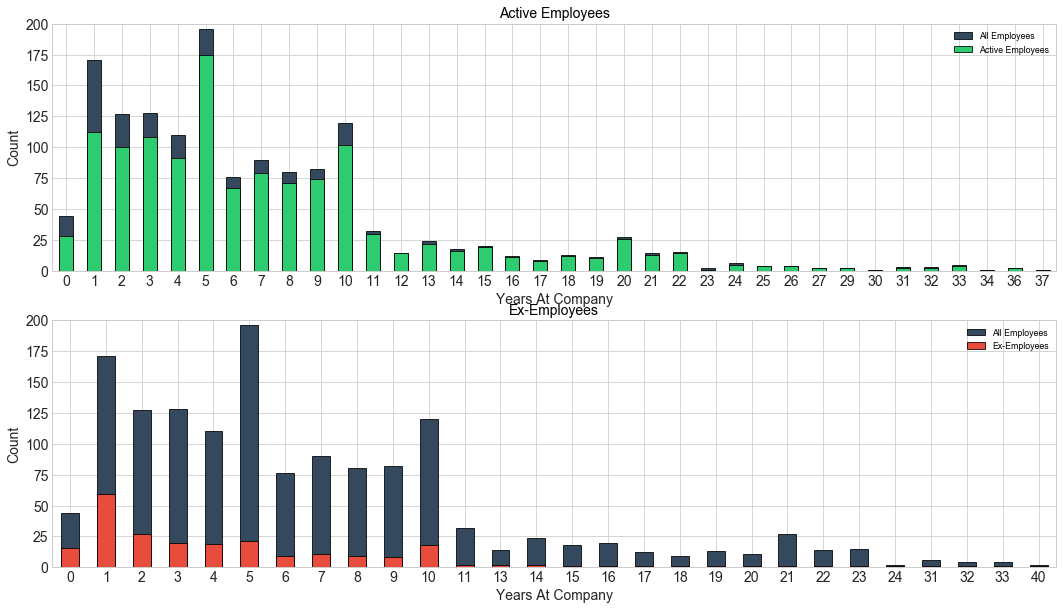

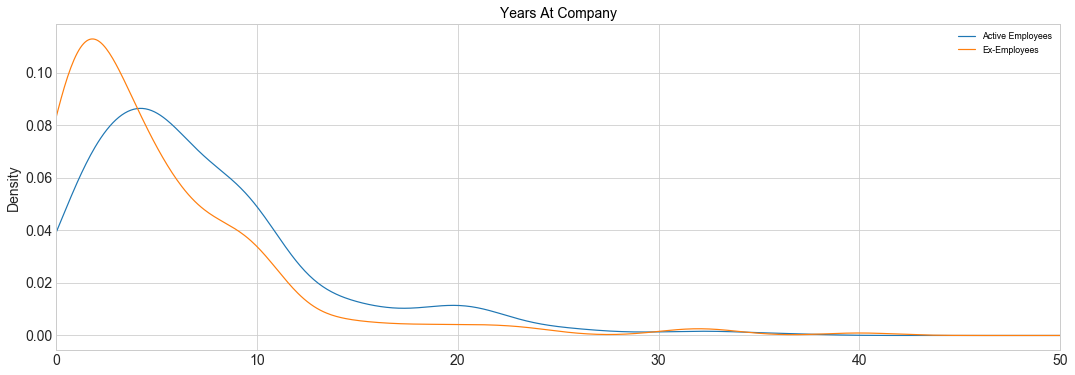

In [68]:
Feat = 'YearsAtCompany'
Range(Feat)
Ratio_Plot2(Feat, XL = 200, Hspace=0.2)
Kernel_Density(Feat,50)

## Years In Current Role

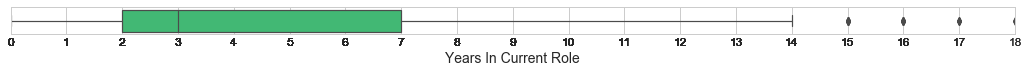

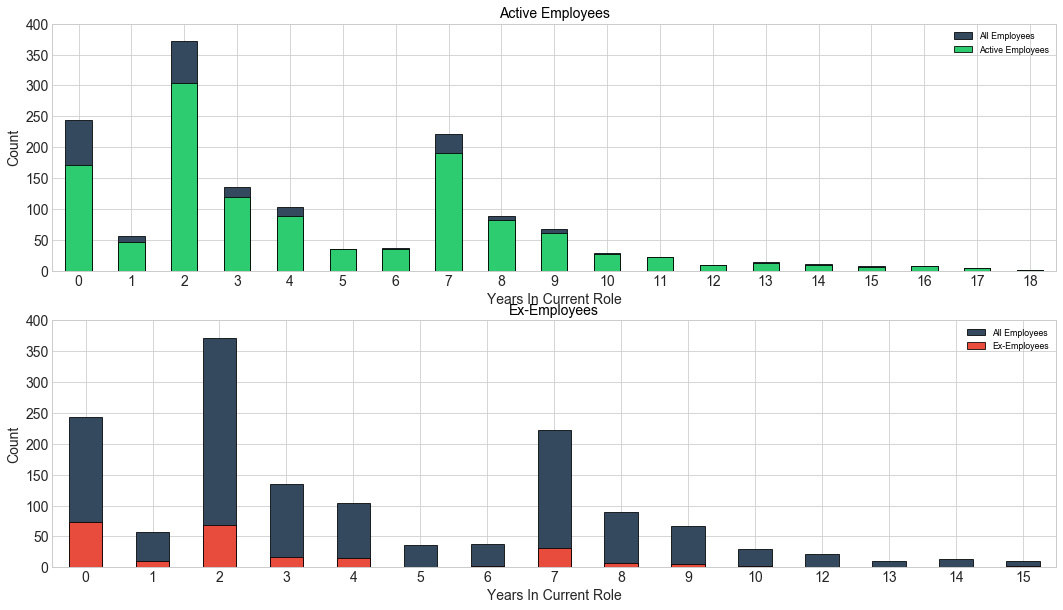

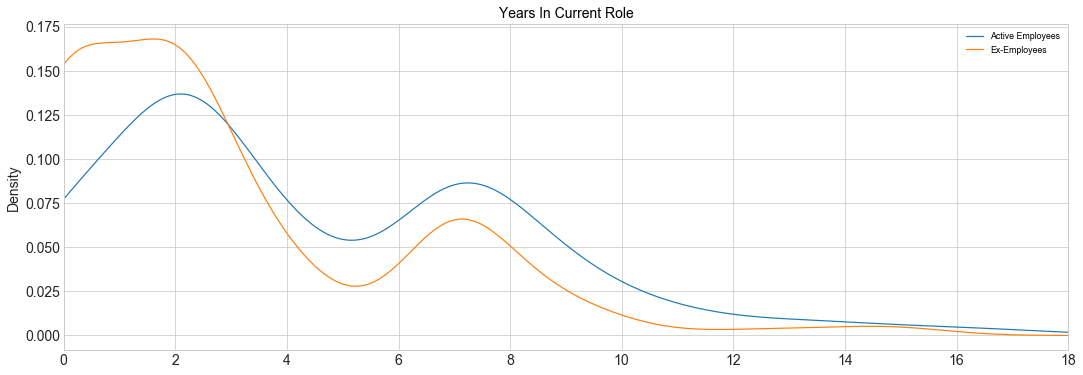

In [69]:
Feat = 'YearsInCurrentRole'
Range(Feat)
Ratio_Plot2(Feat, XL = 4e2, Hspace=0.2)
Kernel_Density(Feat,18)

## Years Since Last Promotion

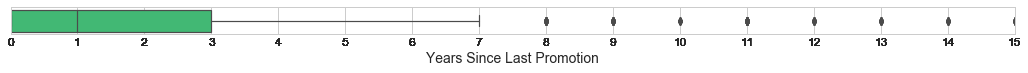

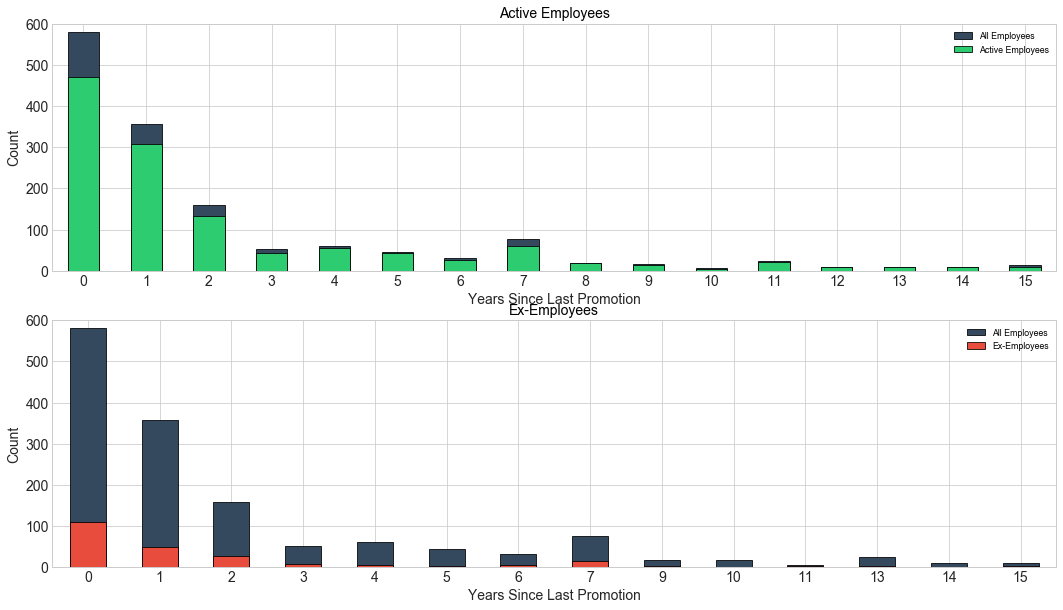

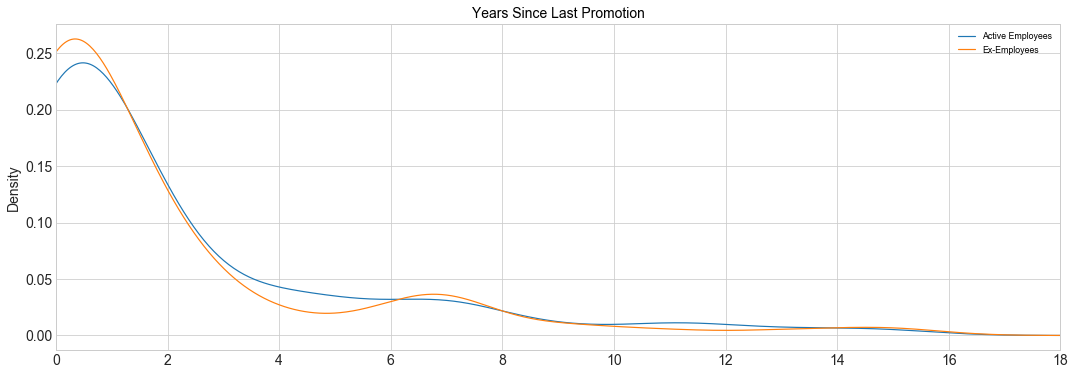

In [70]:
Feat = 'YearsSinceLastPromotion'
Range(Feat)
Ratio_Plot2(Feat, XL = 6e2, Hspace=0.2)
Kernel_Density(Feat,18)

## Years With Current Manager

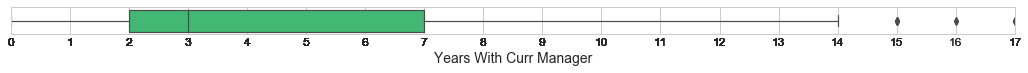

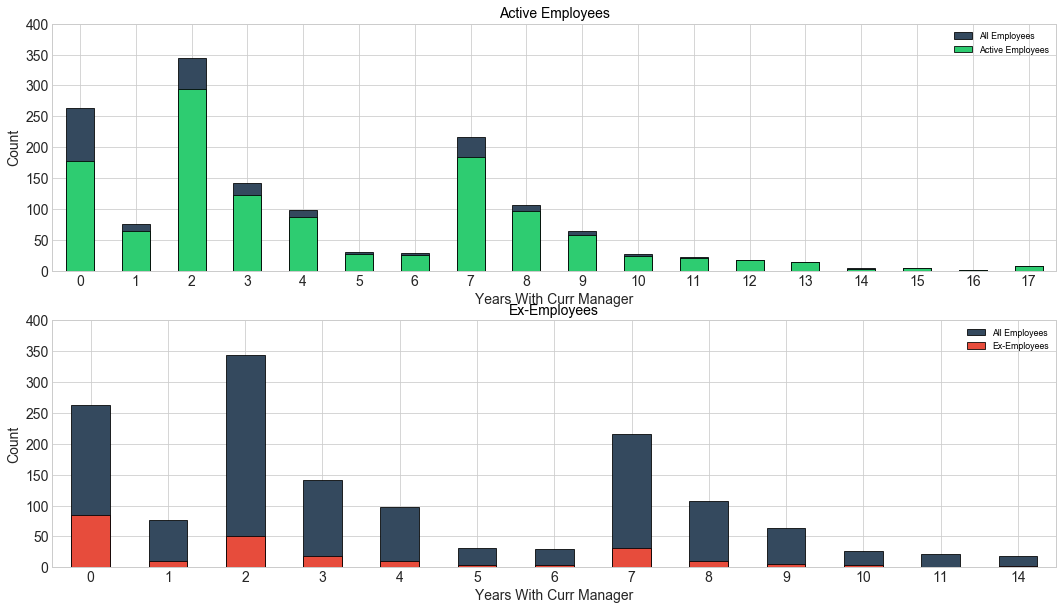

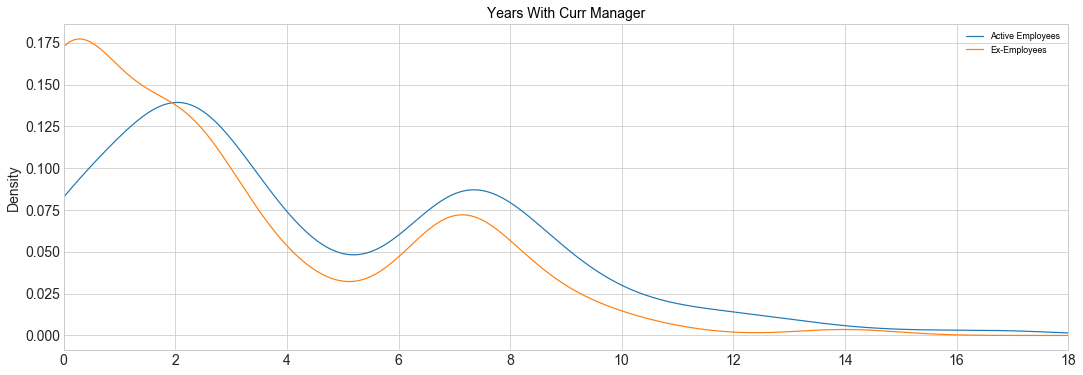

In [71]:
Feat = 'YearsWithCurrManager'
Range(Feat)
Ratio_Plot2(Feat, XL = 4e2, Hspace=0.2)
Kernel_Density(Feat,18)

***